# Hierarchical Model

In [1]:
from pymc3 import Model, Normal, Uniform, Gamma
from pymc3.math import sqrt
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

school_obs = np.array([28, 8, -3, 7,-1, 1, 18, 12])
sigmas = np.array([15, 10, 16, 11, 9, 11, 10, 18])

hierarch_model = Model()

with hierarch_model:
    
    mu = Normal('mu', 0, np.power(10, 6))
    vtau = Gamma('tau^2', 1e-3, np.power(15, 2)*1e-3)
    tau = sqrt(vtau)
    
    theta = []
    y = []
    
    for j in range(len(school_obs)):
        theta.append(Normal('theta{0}'.format(j+1), mu=mu, sd=tau))
        y.append(Normal('y{0}'.format(j+1), mu=theta[j], sd=sigmas[j], observed=school_obs[j]))

In [2]:
from pymc3 import NUTS, sample
from scipy import optimize

with hierarch_model:
    hierarch_trace=sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -52.908: 100%|██████████| 200000/200000 [00:32<00:00, 6127.99it/s]
Finished [100%]: Average ELBO = -52.835
100%|██████████| 10000/10000 [01:25<00:00, 117.56it/s]



mu:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  7.571            4.016            0.183            [-1.153, 15.196]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.600         4.884          7.574          10.148         15.921


theta1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  7.670            4.143            0.185            [-0.852, 15.928]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.674         4.942          7.610          10.344         16.223


theta2:

  Mean             SD               MC Error         95% HPD interval
  --------------------

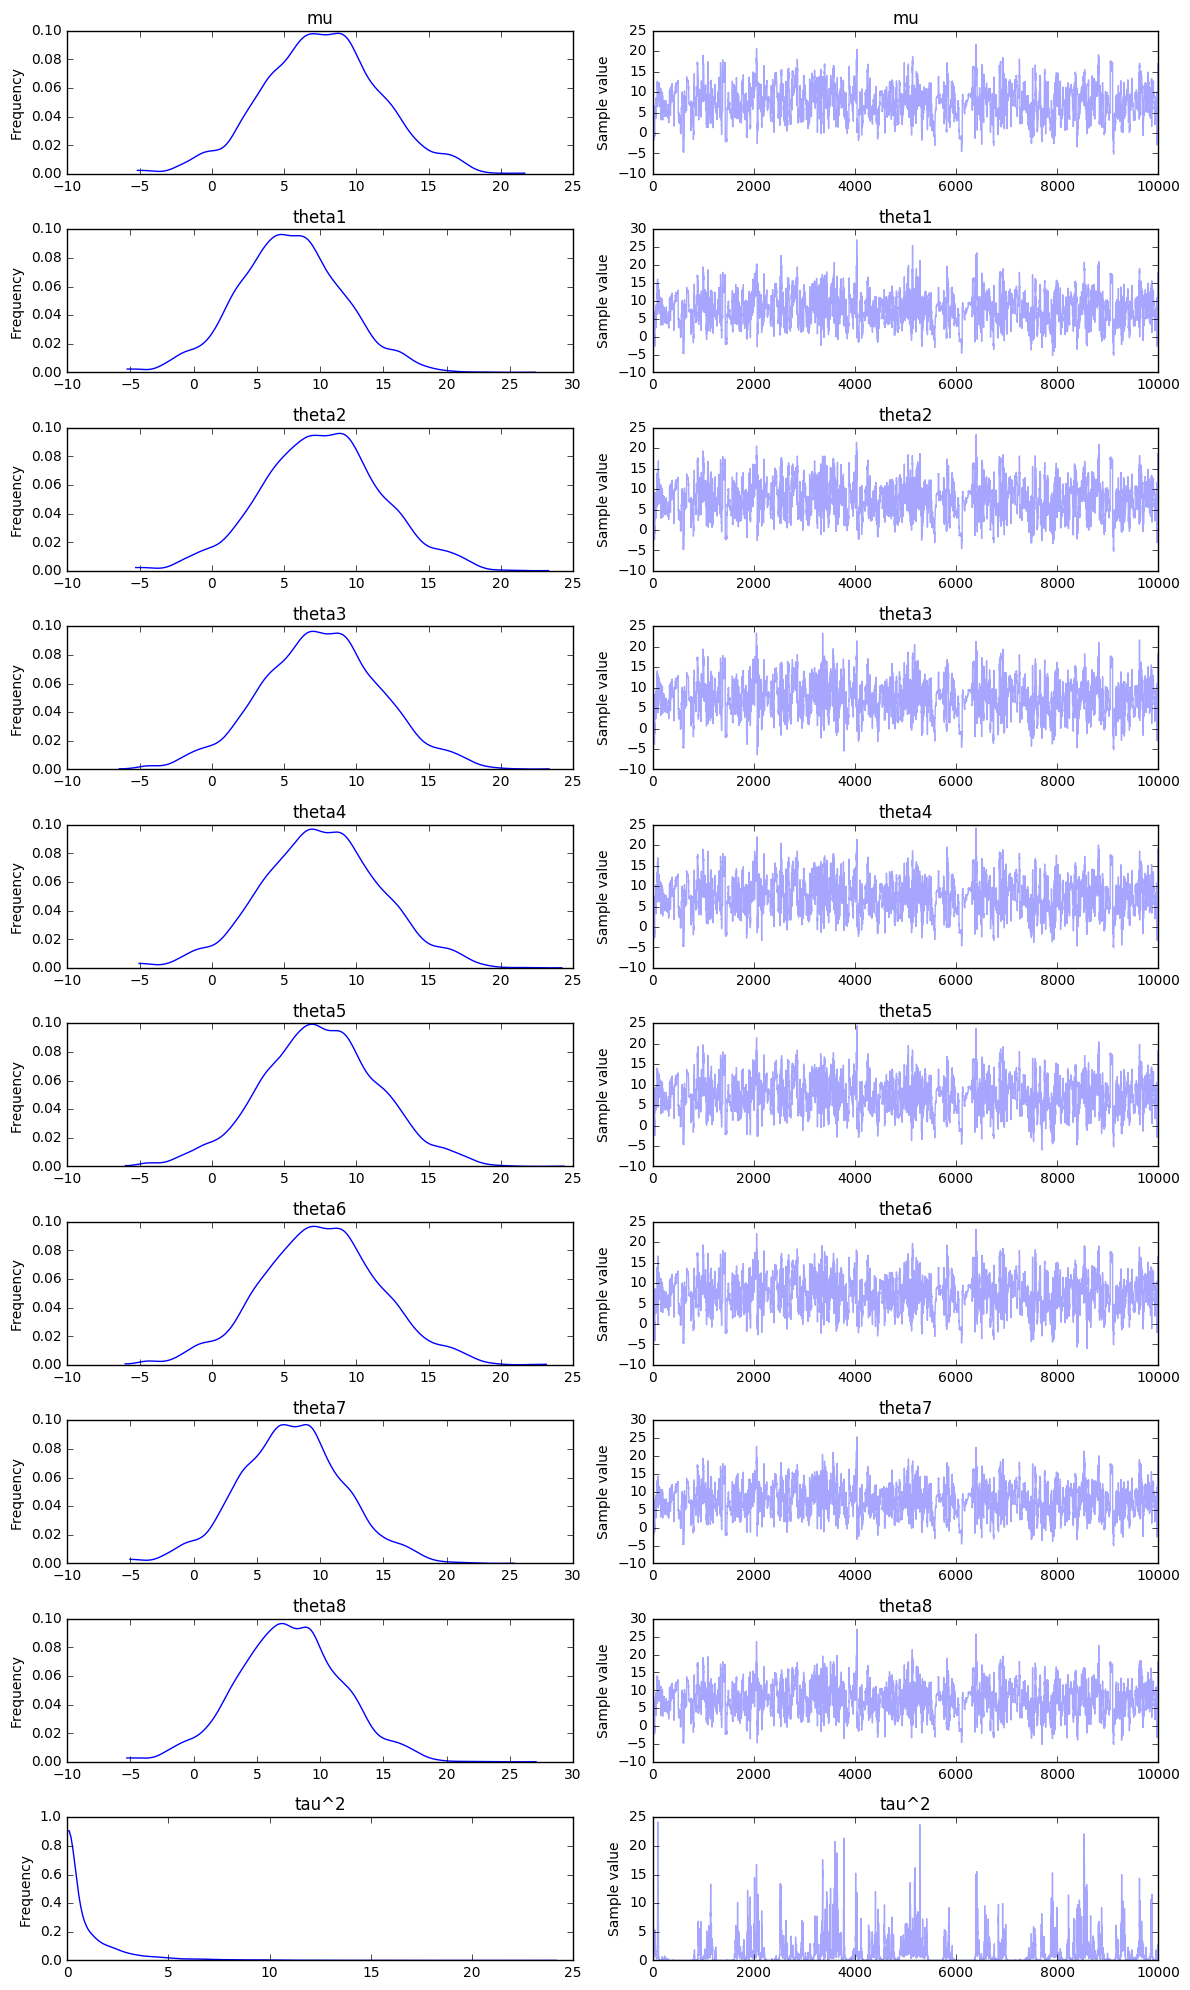

In [3]:
from pymc3 import traceplot, summary

traceplot(hierarch_trace)
summary(hierarch_trace)

In [5]:
import pymc3 as pm

hierarch_dic = pm.stats.dic(model=hierarch_model, trace=hierarch_trace)
hierarch_dic

123.90840857967835

# No-Pooling Model

In [6]:
no_pool_model = Model()

with no_pool_model:
    theta = []
    y = []
    
    for j in range(len(school_obs)):
        theta.append(Normal('theta{0}'.format(j+1), 0, 10000))
        y.append(Normal('y{0}'.format(j+1), mu=theta[j], sd=sigmas[j], observed=school_obs[j]))

In [7]:
with no_pool_model:
    no_pool_trace=sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -81.16: 100%|██████████| 200000/200000 [00:23<00:00, 8397.11it/s] 
Finished [100%]: Average ELBO = -81.153
100%|██████████| 10000/10000 [00:12<00:00, 791.60it/s]



theta1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  28.203           14.678           0.116            [0.384, 56.754]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.414         18.187         28.303         38.174         56.221


theta2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  7.848            10.069           0.085            [-12.141, 27.317]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -11.967        0.895          7.877          14.881         27.686


theta3:

  Mean             SD               MC Error         95% HPD interval
  ----------------

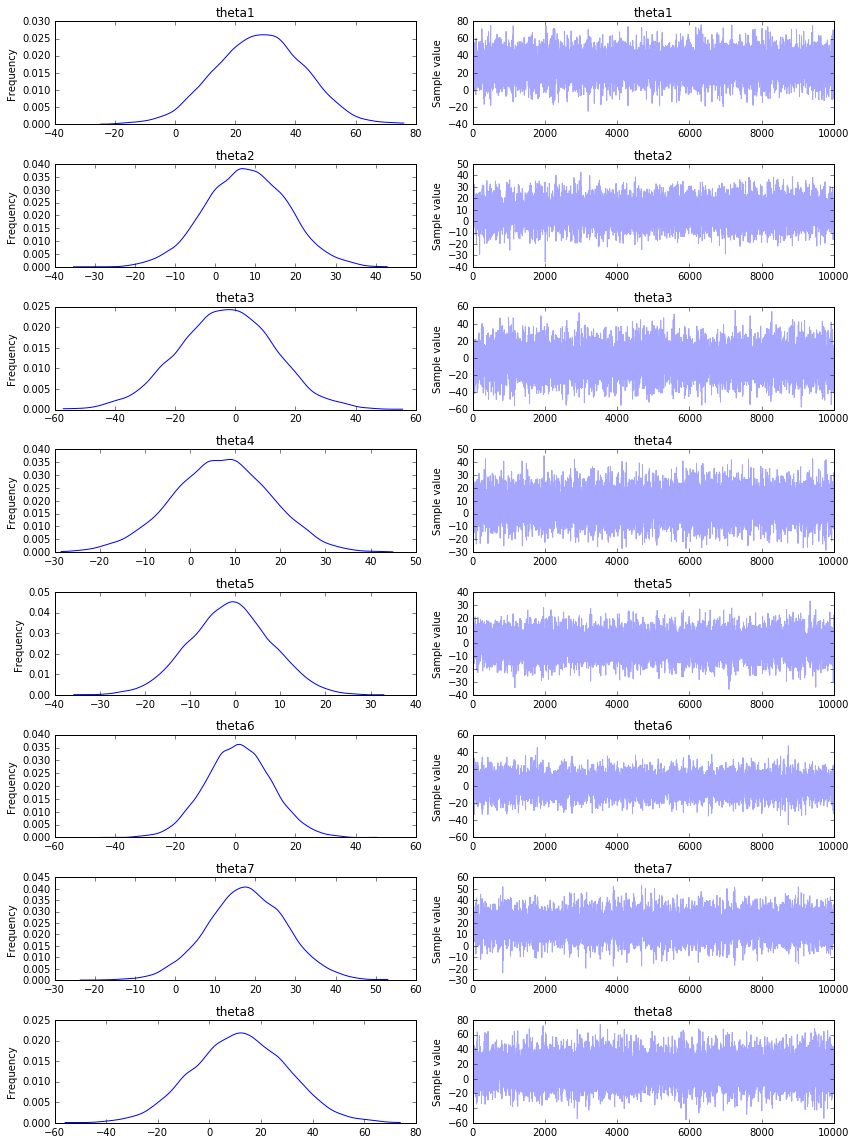

In [31]:
traceplot(no_pool_trace)
summary(no_pool_trace)

In [8]:
no_pool_dic = pm.stats.dic(model=no_pool_model, trace=no_pool_trace)
no_pool_dic

232.8241360983898

# Complete Pooling Model

In [9]:
complete_pool_model = Model()

with complete_pool_model:
    theta = Normal('theta', 0, 10000)
    y = []
    
    for j in range(len(school_obs)):
        y.append(Normal('y{0}'.format(j+1), mu=theta, sd=sigmas[j], observed=school_obs[j]))

In [10]:
with complete_pool_model:
    complete_pool_trace=sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -37.474: 100%|██████████| 200000/200000 [00:15<00:00, 12896.95it/s]
Finished [100%]: Average ELBO = -37.496
100%|██████████| 10000/10000 [00:04<00:00, 2370.51it/s]



theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  7.709            4.093            0.063            [-0.502, 15.777]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.464         5.105          7.695          10.286         15.863



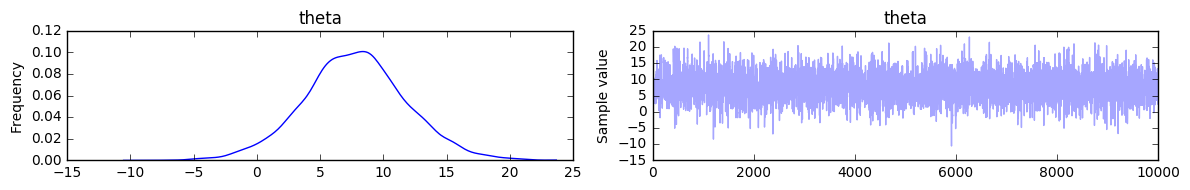

In [11]:
traceplot(complete_pool_trace)
summary(complete_pool_trace)

In [12]:
complete_pool_dic = pm.stats.dic(model=complete_pool_model, trace=complete_pool_trace)
complete_pool_dic

81.628091454915634

# DIC Comparison

In [14]:
print("Model                |  DIC")
print("----------------------------------------")
print("Hierarchical Pooling | {0}".format(hierarch_dic))
print("No Pooling           | {0}".format(no_pool_dic))
print("Complete Pooling     | {0}".format(complete_pool_dic))

Model                |  DIC
----------------------------------------
Hierarchical Pooling | 123.90840857967835
No Pooling           | 232.8241360983898
Complete Pooling     | 81.62809145491563


# Nuclear Pumps Model

In [15]:
from pymc3 import Poisson

t = np.array([94.5, 15.7, 62.9, 126.0, 5.2, 31.4, 1.05, 1.05, 2.1, 10.5]) # Length of operation per pump
failures = np.array([5, 1, 5, 14, 3, 19, 1, 1, 4, 22]) # number of failures per pump

pump_model = Model()
with pump_model:
    beta = Gamma('beta', 1, 1)
    theta = []
    y = []
    
    for i in range(len(failures)):
        theta.append(Gamma('theta{0}'.format(i+1), 1, beta))
        y.append(Poisson('y{0}'.format(i+1), theta[i], observed=(t[i]*failures[i])))

In [18]:
with pump_model:
    pump_trace=sample(10000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -74.646: 100%|██████████| 200000/200000 [00:56<00:00, 3570.18it/s]
Finished [100%]: Average ELBO = -74.698
100%|██████████| 10000/10000 [01:49<00:00, 91.35it/s]



beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.003            0.001            0.000            [0.001, 0.005]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.002          0.003          0.003          0.004          0.005


theta1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  471.608          21.299           0.091            [430.198, 513.350]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  430.668        457.035        471.408        485.629        514.085


theta2:

  Mean             SD               MC Error         95% HPD interval
  ------------------

1.0000025683604417

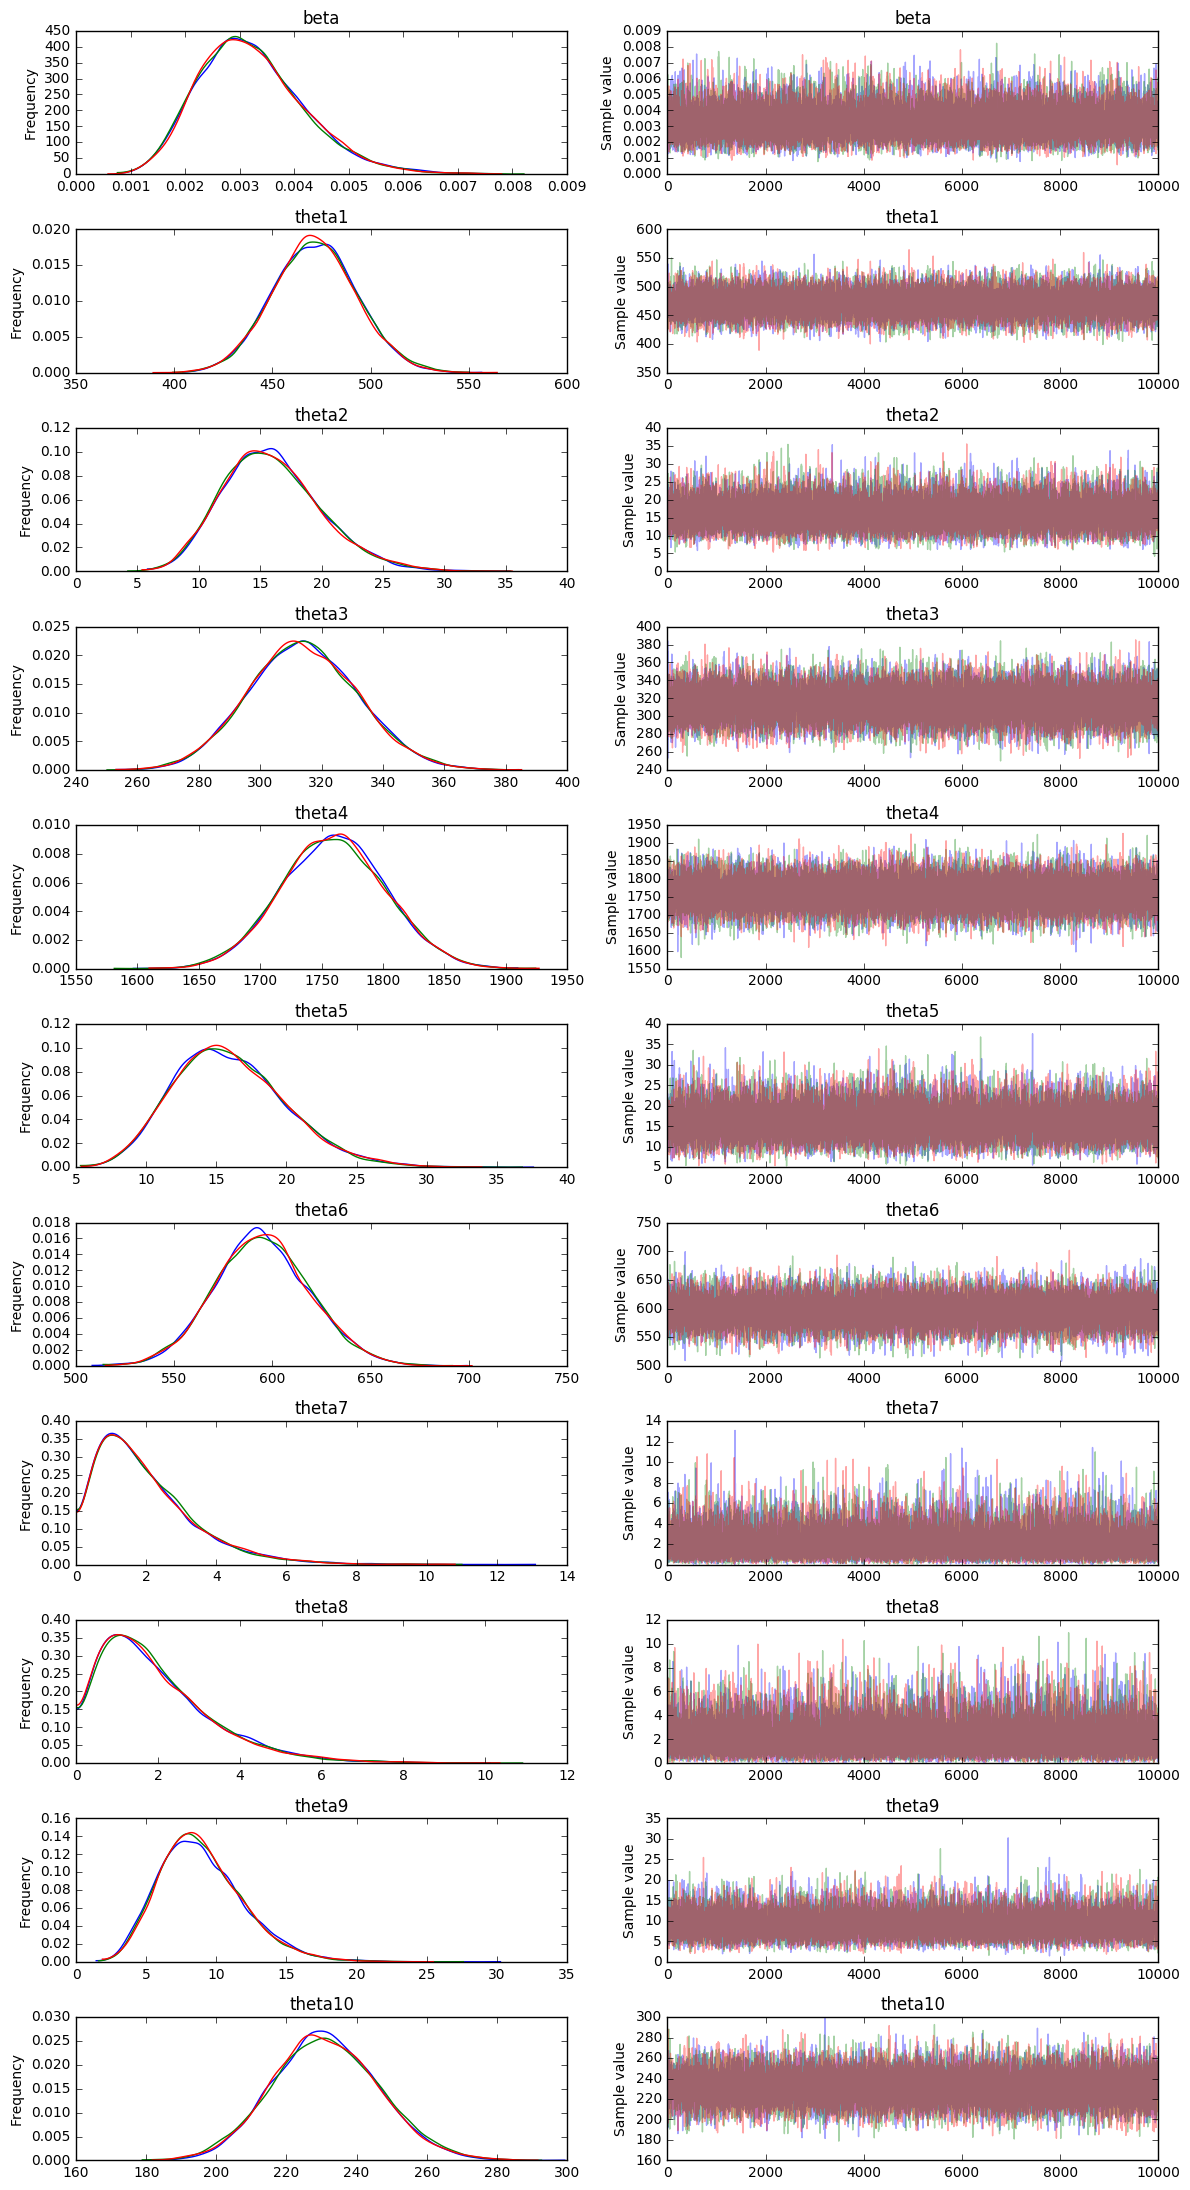

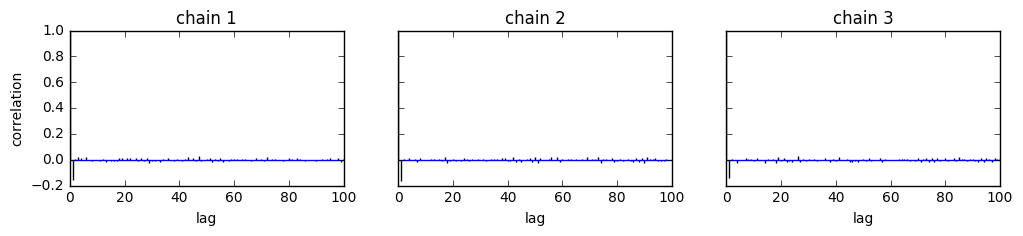

In [21]:
traceplot(pump_trace)
summary(pump_trace)
pm.plots.autocorrplot(pump_trace, varnames=["theta1"])
pm.diagnostics.gelman_rubin(pump_trace)["theta1"]

# Pump Model 2

In [22]:
from pymc3 import Exponential

pump_model2 = Model()
with pump_model2:
    beta = Gamma('beta', 1, 1)
    alpha = Exponential('alpha', 1)
    theta = []
    y = []
    
    for i in range(len(failures)):
        theta.append(Gamma('theta{0}'.format(i+1), alpha, beta))
        y.append(Poisson('y{0}'.format(i+1), theta[i], observed=(t[i]*failures[i])))

In [24]:
with pump_model2:
    pump_trace2=sample(10000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -71.012: 100%|██████████| 200000/200000 [00:55<00:00, 3596.77it/s]
Finished [100%]: Average ELBO = -71.061
100%|██████████| 10000/10000 [02:02<00:00, 81.97it/s]


# DIC Comparison

In [25]:
print("Model                     |  DIC")
print("--------------------------------------------")
print("Model without alpha prior | {0}".format(
    pm.stats.dic(model=pump_model, trace=pump_trace)))
print("Model with alpha prior    | {0}".format(
    pm.stats.dic(model=pump_model2, trace=pump_trace2)))

Model                     |  DIC
--------------------------------------------
Model without alpha prior | 148.34633709392602
Model with alpha prior    | 144.15579539550038
